In [1]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#supress warnings for clean notebooks
import warnings 
warnings.filterwarnings("ignore")

In [3]:
#read dataset
df=pd.read_csv("/Users/premswaroop/Desktop/jupyter1/Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.shape

(34857, 21)

In [6]:
#print number of unique values in each columns 
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

<AxesSubplot:>

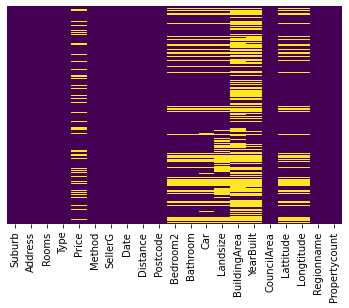

In [7]:
#plotting columns to see amount of null values in each column
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
cols_to_use=['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount','Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Price']
df=df[cols_to_use]
df.shape

(34857, 15)

In [10]:
#number of Na values in each column
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [11]:
cols_to_fill_zero=['Propertycount','Distance','Bedroom2','Bathroom','Car']
df[cols_to_fill_zero]=df[cols_to_fill_zero].fillna(0)

In [12]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [13]:
#fill landsize and buildingarea with mean value
df['Landsize']=df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea']=df['BuildingArea'].fillna(df.BuildingArea.mean())
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [14]:
df.dropna(inplace=True)
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

<AxesSubplot:>

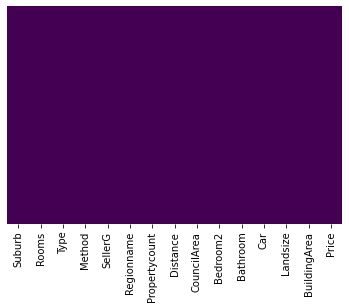

In [15]:
#plotting columns to see amount of null values in each column
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#we can see there is no Na values 

In [17]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
X=df.drop('Price',axis=1)
y=df['Price']

In [22]:
#30% test and 70% train
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=2)

In [24]:
#now will use a regular liner  regression
from sklearn.linear_model import LinearRegression 
reg=LinearRegression().fit(train_X,train_y)

In [25]:
reg.score(test_X,test_y)

0.13853683161537256

In [26]:
reg.score(train_X,train_y)

0.6827792395792723

In [27]:
#we can clearly see the model is overfit , variance is high , 13% to 68%.
#now let's do lasso regression (L1 regularization)

In [38]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(train_X,train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [39]:
lasso_reg.score(test_X,test_y)

0.6636111369404488

In [40]:
lasso_reg.score(train_X,train_y)

0.6766985624766824

In [41]:
#now we can see the variance has reduced so much
#we can see the accuracy is around 66-67% which is not good but variance has reduced

In [47]:
#now let's do L2 regularization or ridge regression
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(train_X,train_y)
ridge_reg.score(train_X,train_y)

0.6622376739684328

In [48]:
ridge_reg.score(test_X,test_y)

0.6670848945194958